## Simple and Multiple Linear Regression

### Simple linear regression

**Question:** Is there a relationship between water salinity & water temperature? Can you predict the water temperature(y) based on salinity(X)?

##### About the dataset

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature. 

In [71]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [72]:
# load data
bottle = pd.read_csv('bottle/bottle.csv')
bottle.head(3)

C:\Users\krish\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# extracting only temp and salinity from the dataset
bottle = bottle[['Salnty','T_degC']]
bottle.head(5)

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [74]:
# renameing columns
bottle.columns = ['Salinity','Temperature']
# taking only first 1000 observations
bottle = bottle[:][:1000]
bottle.head(5)

,Salinity,Temperature
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


<AxesSubplot:xlabel='Salinity', ylabel='Temperature'>

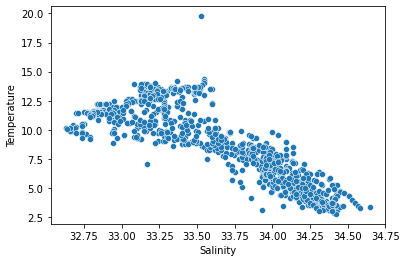

In [75]:
# scatterplot
sns.scatterplot(x='Salinity', y='Temperature', data=bottle)

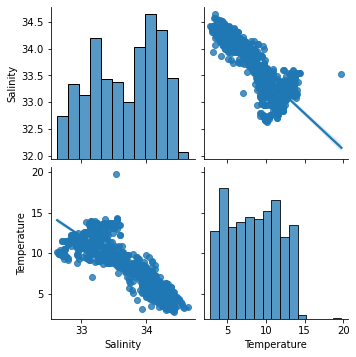

In [76]:
# pairplot of regression type/kind
sns.pairplot(data = bottle, kind = "reg")

In [77]:
# check null values
bottle.isnull().sum()

Salinity       30
Temperature     2
dtype: int64

In [78]:
# missing value handling
# using forward fill 
bottle.fillna( method = 'ffill', inplace = True )

In [79]:
# Feature selection
X = np.array(bottle['Salinity']).reshape(-1, 1) # column vector
y = np.array(bottle['Temperature']).reshape(-1, 1) # column vector

In [80]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
# Applying linear regression
linreg_bottle = LinearRegression()
linreg_bottle.fit(X_train, y_train)

# Target variable
y_pred = linreg_bottle.predict(X_test)
accuracy_score = linreg_bottle.score(X_test, y_test)
print("Linear regression model accuracy score: ", accuracy_score)

Linear regression model accuracy score:  0.7408257585226128


In [82]:
# R2 score of linear regression model
from sklearn.metrics import r2_score

print("R2-score:", r2_score(y_test, y_pred))

R2-score: 0.7408257585226128


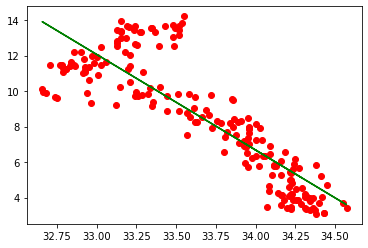

In [83]:
# Plotting linear regression model

plt.scatter(x = X_test, y = y_test, color = 'r')
plt.plot(X_test, y_pred, color = 'g')
plt.show()

In [84]:
# calculating slope and intercept
print("Slope: ", linreg_bottle.coef_)
print("Intercept:", linreg_bottle.intercept_)

Slope:  [[-5.38779976]]
Intercept: [189.86438469]


##### Conclusion
The above simple linear model gives an accuracy of 74.08%

### Multiple linear regression

**Question:** Is there a relationship between the quality of the wine and the other features? Can you predict the quality of wine based on multiple features?

##### About the dataset
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.

https://www.kaggle.com/gauravduttakiit/red-wine-quality-linear-regression/notebook

In [102]:
wine = pd.read_csv('winequality-red.csv')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [104]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Our target variable 'quality' is int datatype, where as all other variables are float. We will rescale the dataset to maintain consistensy.

In [105]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

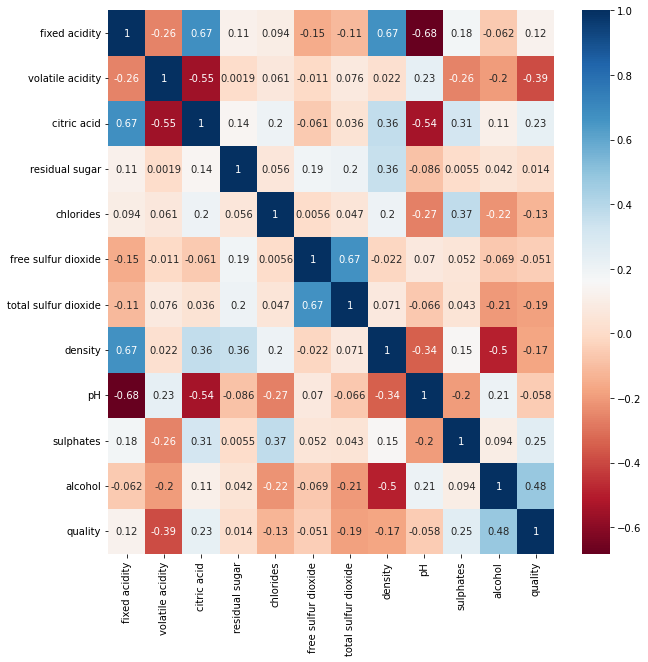

In [106]:
# correlation plot
plt.figure(figsize = (10,10))
sns.heatmap(wine.corr(), annot = True, cmap = 'RdBu')
plt.show()

The three features that seem to have a somewhat positive relationship with the while quality are 'alcohol', 'sulphates' and 'citric acid'.

Let's take these 3 features for our analysis.

Another important step is to rescale the dataset. 

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wine[:] = scaler.fit_transform(wine[:])
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


<function matplotlib.pyplot.show(close=None, block=None)>

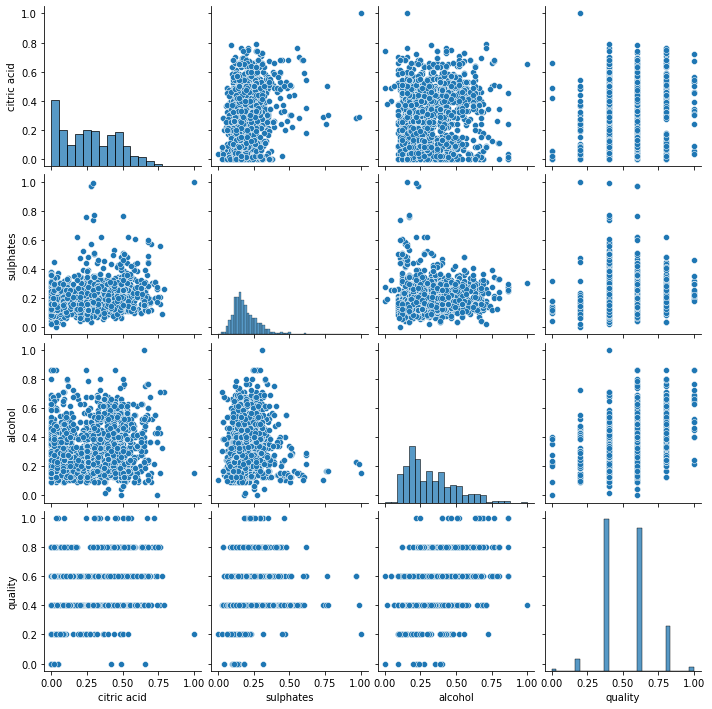

In [108]:
# pairplot
wine_subset = wine[['citric acid', 'sulphates', 'alcohol', 'quality']]
sns.pairplot(wine_subset)
plt.show()

In [109]:
# Feature selection
y_target = wine_subset.pop('quality')
X_predictors = wine_subset

In [110]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_predictors, y_target, test_size = 0.2, random_state = 42)

In [111]:
# Applying regression
wine_linreg = LinearRegression()
wine_linreg.fit(X_train, y_train)

# Target variable
y_pred = wine_linreg.predict(X_test)

# Accuracy
print("Accuracy score: ", wine_linreg.score(X_test, y_test))

# R2-score
print("R2 score: ", r2_score(y_test, y_pred))

Accuracy score:  0.31321210417005096
R2 score:  0.31321210417005096


In [112]:
# Model evaluation using RMSE, MSE, MAE

from sklearn import metrics

print("RMSE score: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MSE score: ", metrics.mean_squared_error(y_test, y_pred))
print("MAE score: ", metrics.mean_absolute_error(y_test, y_pred))

RMSE score:  0.13398804634335096
MSE score:  0.017952796562907963
MAE score:  0.10808593931672661
